<a href="https://colab.research.google.com/github/sebastianSbg/IML-projects/blob/master/Project_1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries, data & mounting drive

In [ ]:
# Performing ridge regression on a dataset & evaluatings RMSE for each lambda chosen
# Created by Sebastian Bommer 2020-05-17
# Modified by ___

Ridge regression:
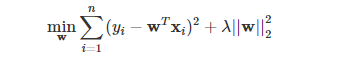



In [ ]:
# importing libraries
import pandas as pd
import sklearn
import numpy as np

In [ ]:
# mounting google drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading data
baseDir = '/content/drive/My Drive/ETHZ/IML/Project_1a/'
dir = '/content/drive/My Drive/ETHZ/IML/Project_1a/train.csv'

D = pd.read_csv(dir, index_col='Id')
print(f'\n Data: \n {D}')

X_df = D.iloc[:,1:-1]
y_df = D.iloc[:,0]

X = np.array(X_df)
y = np.array(y_df)

print(X[0:2,:])
print(y[0:5])


 Data: 
         y        x1    x2     x3   x4  ...    x9    x10   x11     x12    x13
Id                                     ...                                  
0    22.6   0.06724   0.0   3.24  0.0  ...   4.0  430.0  16.9  375.21   7.34
1    50.0   9.23230   0.0  18.10  0.0  ...  24.0  666.0  20.2  366.15   9.53
2    23.0   0.11425   0.0  13.89  1.0  ...   5.0  276.0  16.4  393.74  10.50
3     8.3  24.80170   0.0  18.10  0.0  ...  24.0  666.0  20.2  396.90  19.77
4    21.2   0.05646   0.0  12.83  0.0  ...   5.0  398.0  18.7  386.40  12.34
..    ...       ...   ...    ...  ...  ...   ...    ...   ...     ...    ...
501  18.5   0.28392   0.0   7.38  0.0  ...   5.0  287.0  19.6  391.13  11.74
502  36.4   0.08664  45.0   3.44  0.0  ...   5.0  398.0  15.2  390.49   2.87
503  19.2   0.15098   0.0  10.01  0.0  ...   6.0  432.0  17.8  394.51  10.30
504  16.6   0.22927   0.0   6.91  0.0  ...   3.0  233.0  17.9  392.74  18.80
505  23.1   0.13914   0.0   4.05  0.0  ...   5.0  296.0  16.6  396

# Creating k-fold split

In [ ]:
from sklearn.model_selection import KFold

# hyper parameter
n_fold = 10

kf = KFold(n_fold, shuffle=False)

ind = np.arange(y.shape[0])

ind_splits = list(kf.split(ind))

In [ ]:
X[ind_splits[0][0],:]

array([[1.7899e-01, 0.0000e+00, 9.6900e+00, ..., 3.9100e+02, 1.9200e+01,
        3.9329e+02],
       [5.3700e-01, 0.0000e+00, 6.2000e+00, ..., 3.0700e+02, 1.7400e+01,
        3.7835e+02],
       [3.6894e-01, 2.2000e+01, 5.8600e+00, ..., 3.3000e+02, 1.9100e+01,
        3.9690e+02],
       ...,
       [1.5098e-01, 0.0000e+00, 1.0010e+01, ..., 4.3200e+02, 1.7800e+01,
        3.9451e+02],
       [2.2927e-01, 0.0000e+00, 6.9100e+00, ..., 2.3300e+02, 1.7900e+01,
        3.9274e+02],
       [1.3914e-01, 0.0000e+00, 4.0500e+00, ..., 2.9600e+02, 1.6600e+01,
        3.9690e+02]])

# Train ridge regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

lam = [0.01, 0.1, 1, 10, 100]

errors = []
for alph in lam:

  clf = Ridge(alpha=alph,solver='cholesky')

  errorVec = []
  for i in range(len(ind_splits)):
    print(f'Training on {i} fold and lambda {alph}')
    model = clf.fit(X[ind_splits[i][0],:], y[ind_splits[i][0]])
    y_pred = model.predict(X[ind_splits[i][1],:])

    errorVec.append(np.sqrt(mean_squared_error(y_pred, y[ind_splits[i][1]])))
  errors.append(np.mean(errorVec))

print(f'The mean RMS errors are: {errors}')
    
#     # calculating the distance between actual & predicted y values
#     dist = np.array(y_pred - y[ind_splits[i][1]])    
#     dist_vec.append(np.dot(dist,dist))

#   print(dist_vec)
#   errors.append(np.sqrt(np.mean(dist_vec)))
  
# print(f'\nThe RMSE error is: {errors}')

Training on 0 fold and lambda 0.01
Training on 1 fold and lambda 0.01
Training on 2 fold and lambda 0.01
Training on 3 fold and lambda 0.01
Training on 4 fold and lambda 0.01
Training on 5 fold and lambda 0.01
Training on 6 fold and lambda 0.01
Training on 7 fold and lambda 0.01
Training on 8 fold and lambda 0.01
Training on 9 fold and lambda 0.01
Training on 0 fold and lambda 0.1
Training on 1 fold and lambda 0.1
Training on 2 fold and lambda 0.1
Training on 3 fold and lambda 0.1
Training on 4 fold and lambda 0.1
Training on 5 fold and lambda 0.1
Training on 6 fold and lambda 0.1
Training on 7 fold and lambda 0.1
Training on 8 fold and lambda 0.1
Training on 9 fold and lambda 0.1
Training on 0 fold and lambda 1
Training on 1 fold and lambda 1
Training on 2 fold and lambda 1
Training on 3 fold and lambda 1
Training on 4 fold and lambda 1
Training on 5 fold and lambda 1
Training on 6 fold and lambda 1
Training on 7 fold and lambda 1
Training on 8 fold and lambda 1
Training on 9 fold and

# Exporting to csv

In [ ]:
errors_df = pd.DataFrame(errors)
filePath = '/content/drive/My Drive/ETHZ/IML/Project_1a/' + 'rmse.csv'
errors_df.to_csv(filePath, index=False, float_format='%.3f',header=False)

In [ ]:
errors_df

,0
0,5.198115
1,5.196076
2,5.202389
3,5.260886
4,5.501556
